=============================================================================<br>
PREDICTING PRICE OF PRE-OWNED CARS <br>
=============================================================================

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

=============================================================================<br>
Setting dimensions for plot <br>
=============================================================================

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

=============================================================================<br>
Reading CSV file<br>
=============================================================================

In [3]:
os.chdir('F:/DS tut/datasets')

In [4]:
cars_data=pd.read_csv('cars_sampled.csv' )

=============================================================================<br>
Creating copy<br>
=============================================================================

In [5]:
cars=cars_data.copy()

=============================================================================<br>
Structure of the dataset<br>
=============================================================================

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

=============================================================================<br>
Summarizing data<br>
=============================================================================

In [7]:
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


To display maximum set of columns

In [8]:
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


=============================================================================<br>
Dropping unwanted columns<br>
=============================================================================

In [9]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

=============================================================================<br>
Removing duplicate records<br>
=============================================================================

In [10]:
cars.drop_duplicates(keep='first',inplace=True)
#470 duplicate records

=============================================================================<br>
Data cleaning<br>
=============================================================================

No. of missing values in each column

In [11]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

Variable yearOfRegistration

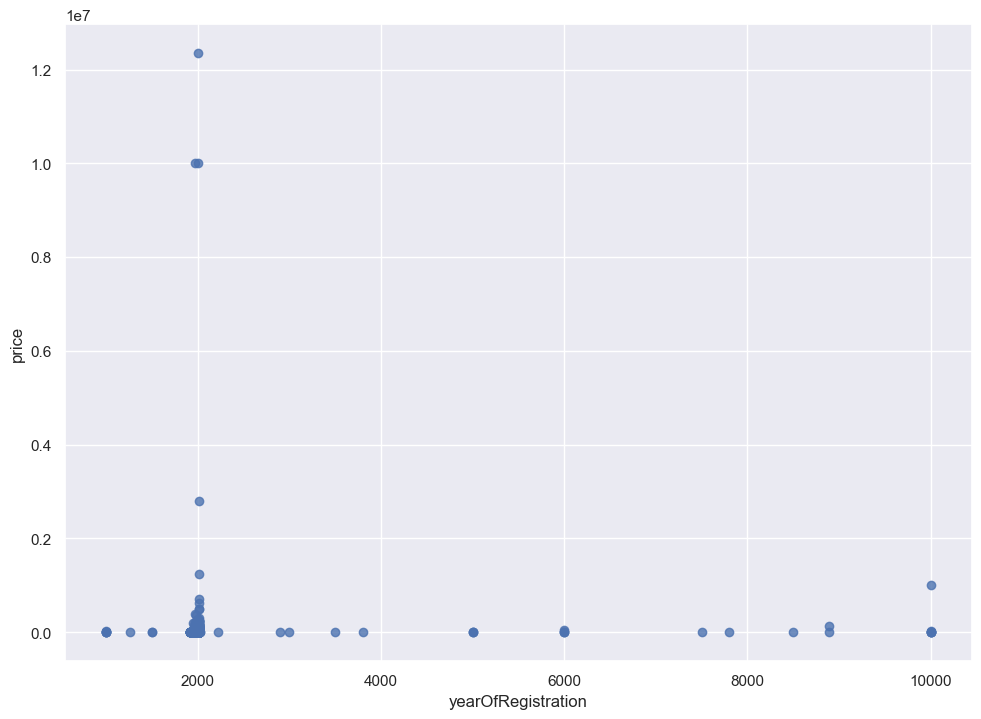

In [12]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True, 
            fit_reg=False, data=cars)
plt.show()
# Working range- 1950 and 2018

Variable price

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


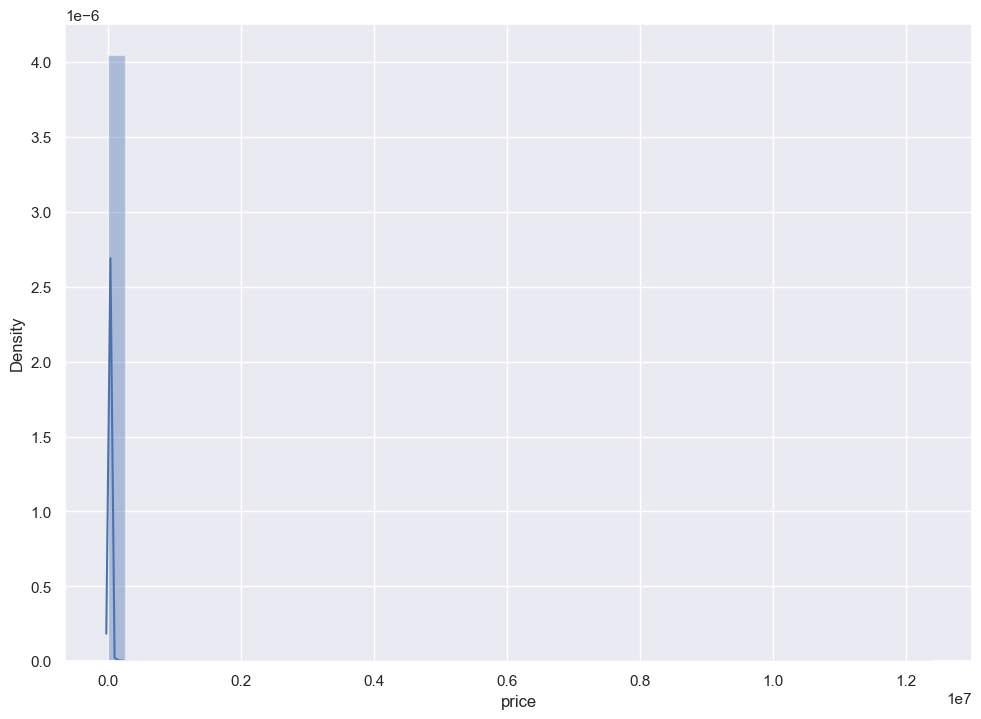

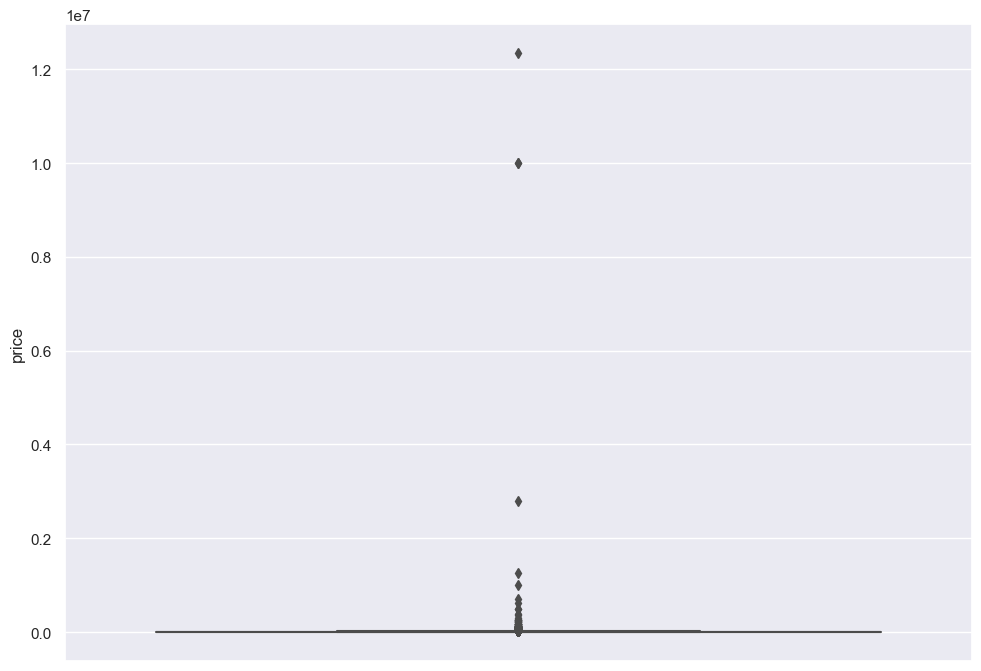

1748

In [13]:
price_count=cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])
plt.show()
cars['price'].describe()
sns.boxplot(y=cars['price'])
plt.show()
sum(cars['price'] > 150000)
sum(cars['price'] < 100)
# Working range- 100 and 150000

Variable powerPS

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


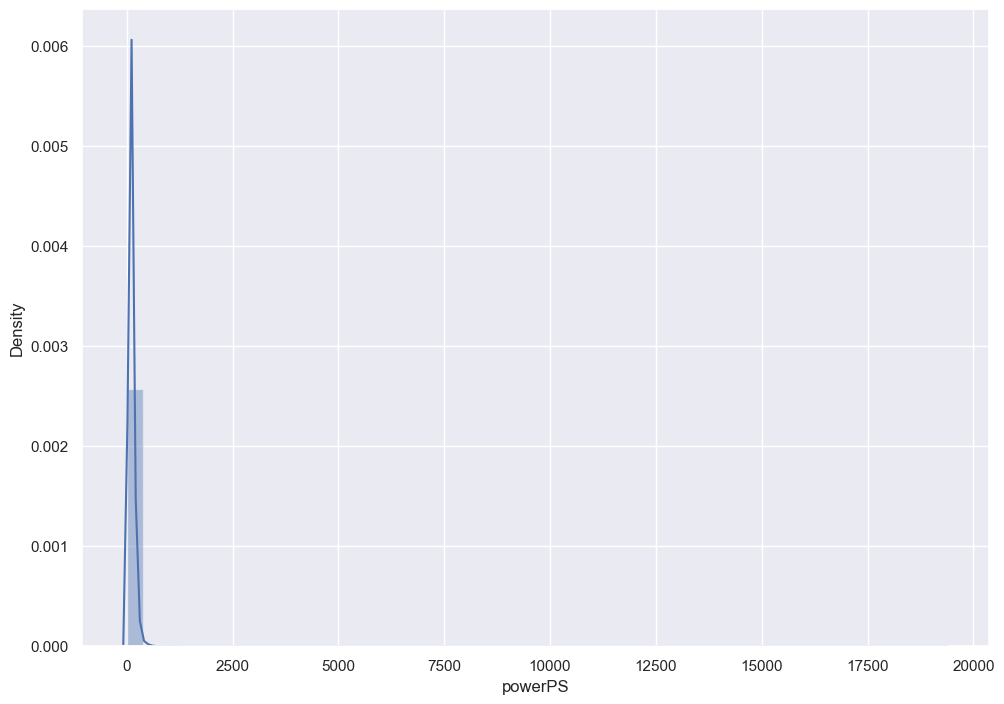

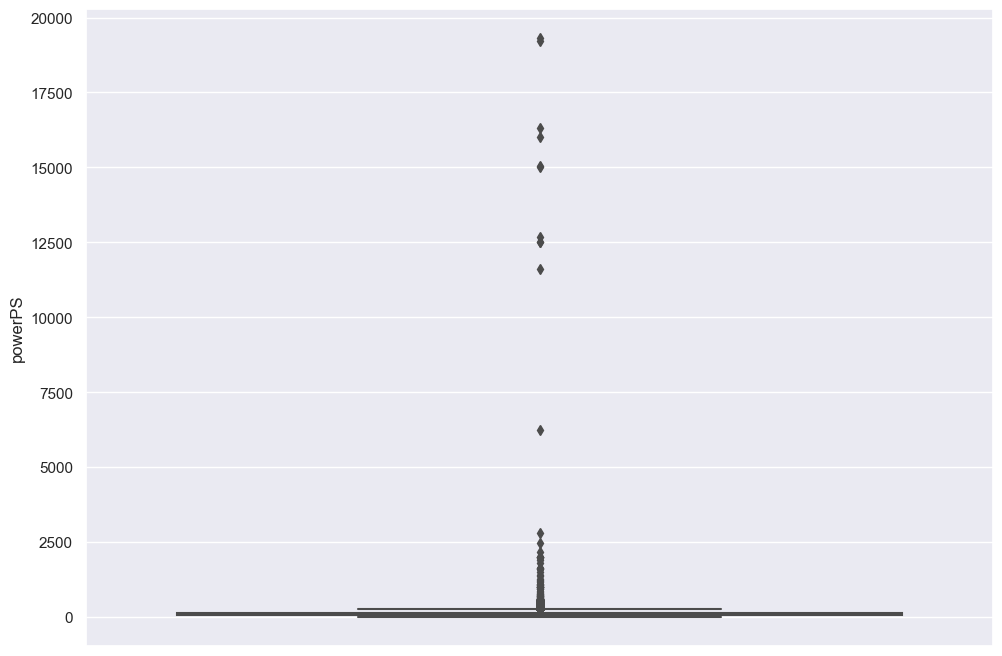

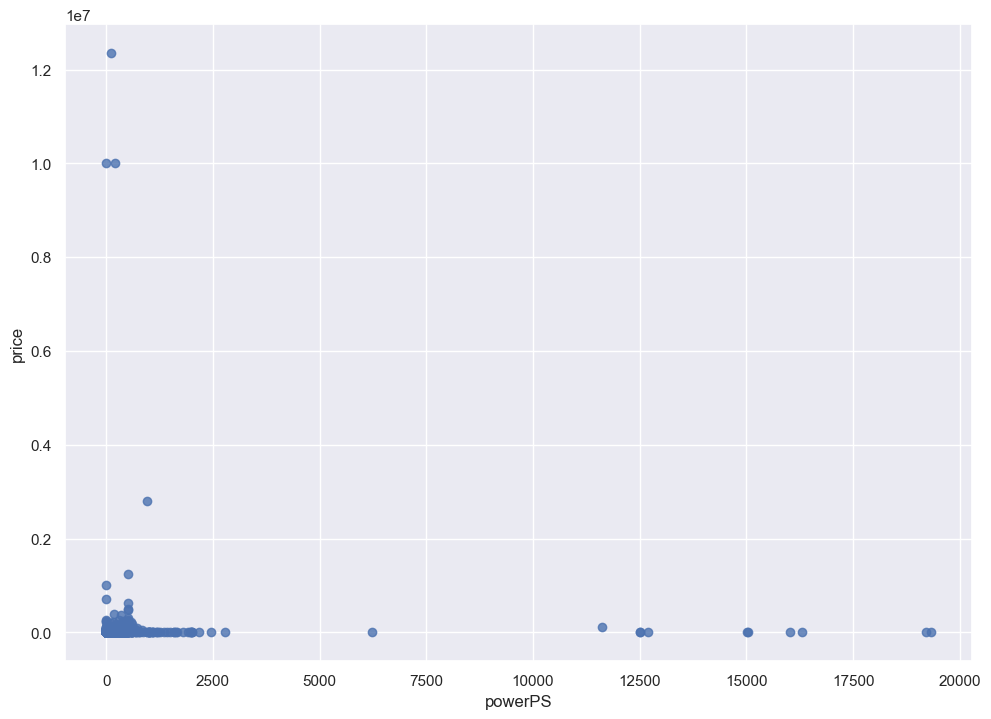

5565

In [14]:
power_count=cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])
plt.show()
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])
plt.show()
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)
plt.show()
sum(cars['powerPS'] > 500)
sum(cars['powerPS'] < 10)
# Working range- 10 and 500

=============================================================================<br>
Working range of data<br>
=============================================================================

Working range of data

In [15]:
cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]
# ~6700 records are dropped

Further to simplify- variable reduction<br>
Combining yearOfRegistration and monthOfRegistration

In [16]:
cars['monthOfRegistration']/=12

Creating new varible Age by adding yearOfRegistration and monthOfRegistration

In [17]:
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

Dropping yearOfRegistration and monthOfRegistration

In [18]:
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

Visualizing parameters 

Age

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


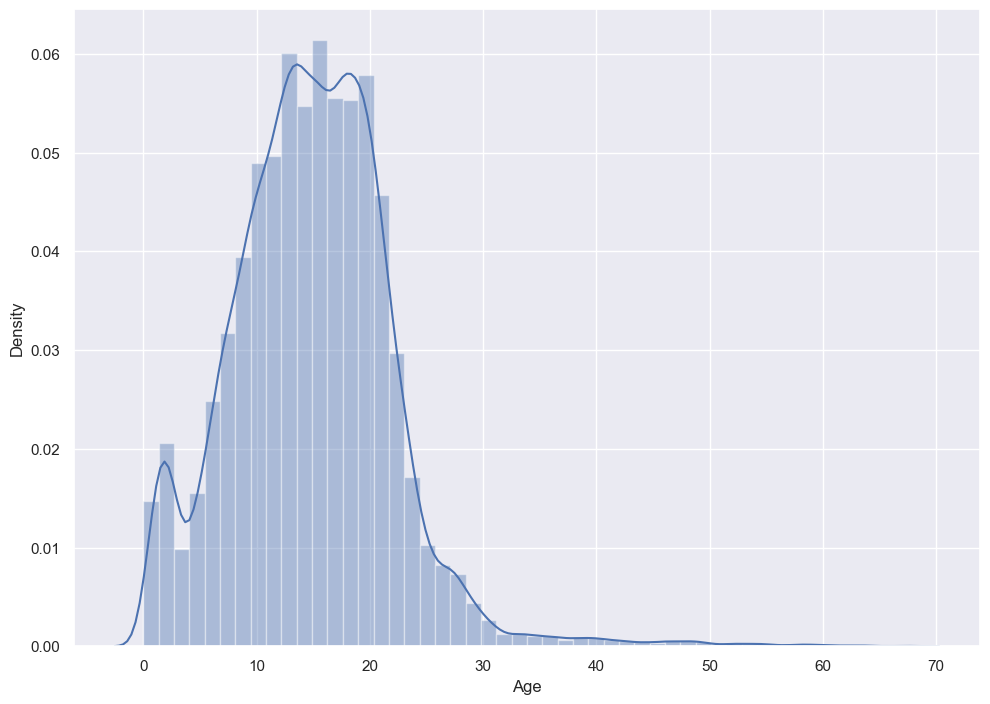

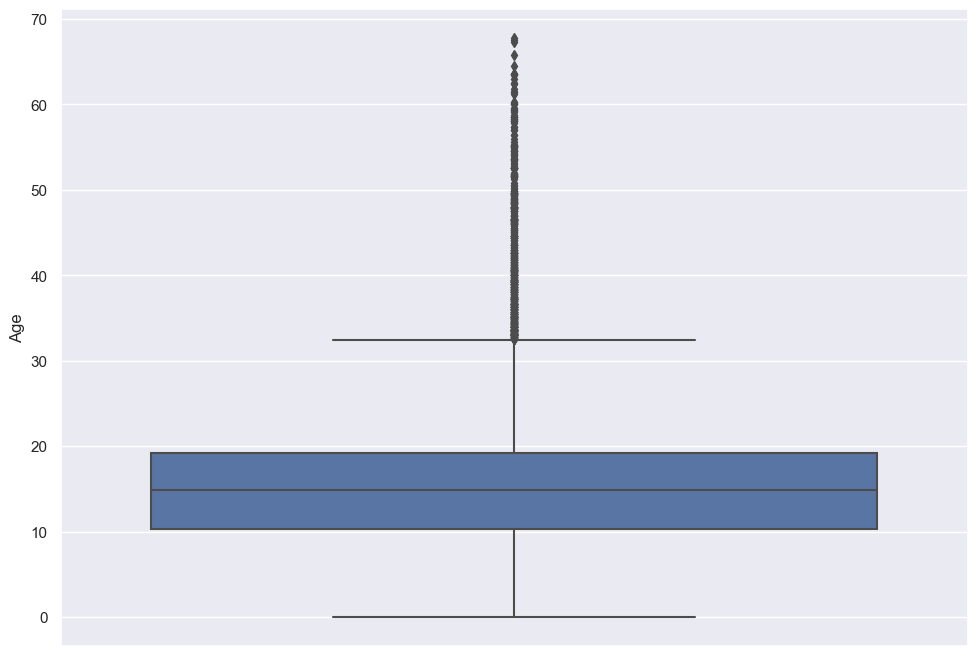

In [19]:
sns.distplot(cars['Age'])
plt.show()
sns.boxplot(y=cars['Age'])
plt.show()

price

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


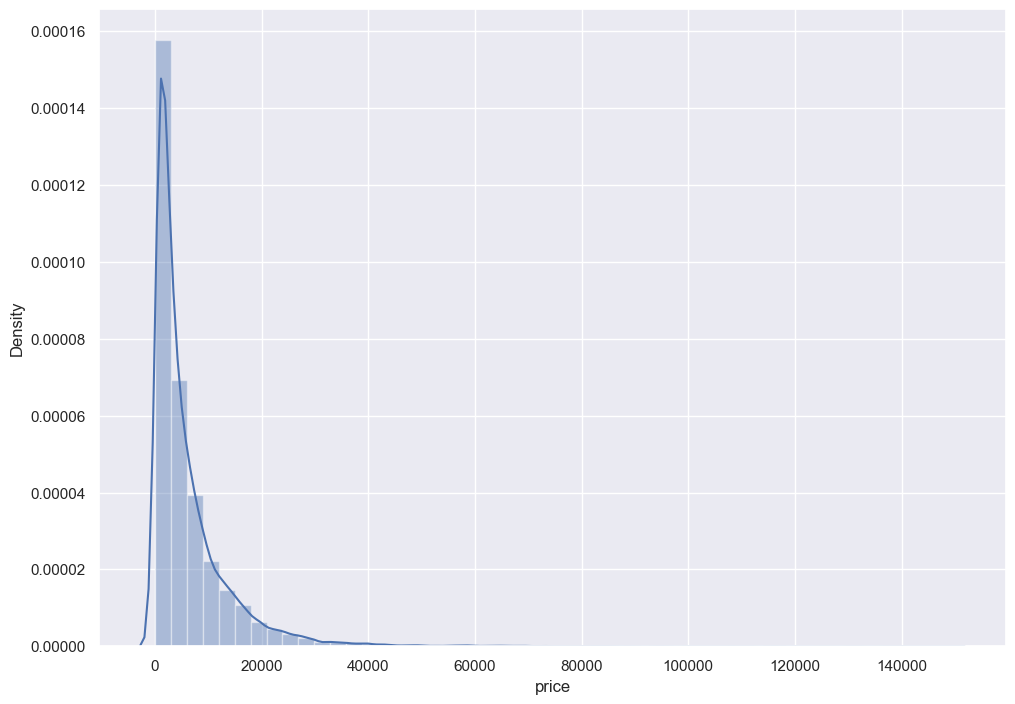

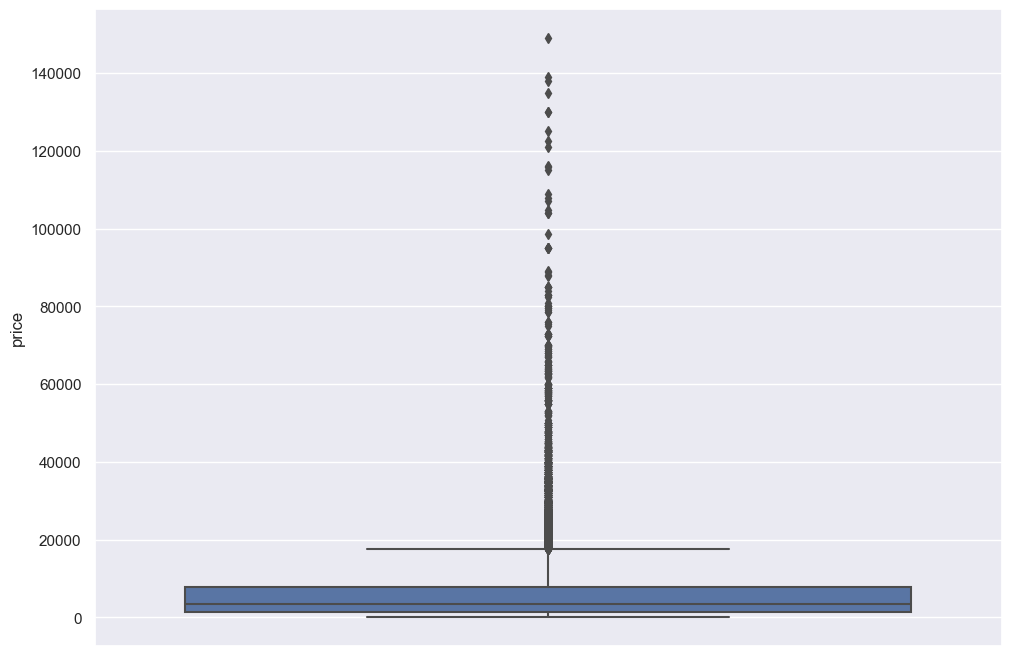

In [20]:
sns.distplot(cars['price'])
plt.show()
sns.boxplot(y=cars['price'])
plt.show()

powerPS

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


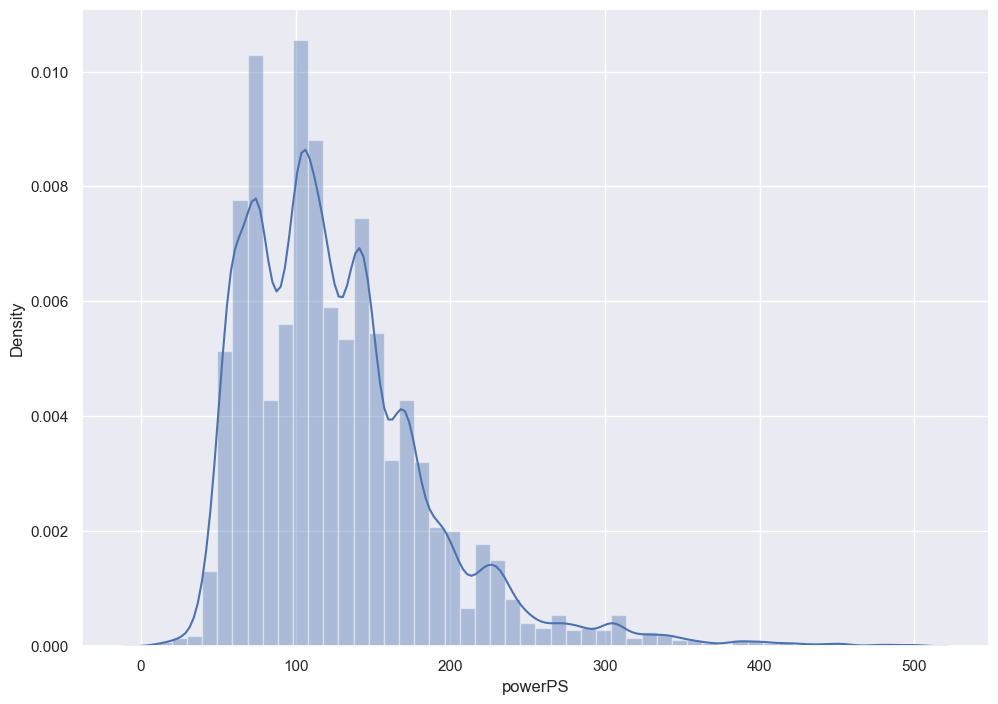

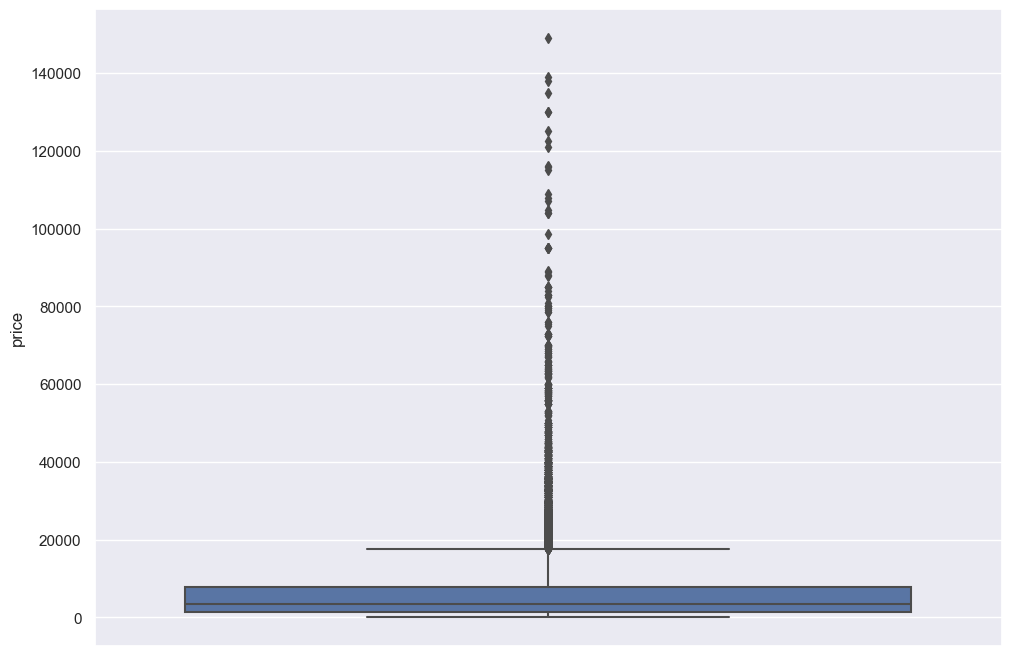

In [21]:
sns.distplot(cars['powerPS'])
plt.show()
sns.boxplot(y=cars['price'])
plt.show()

Visualizing parameters after narrowing working range<br>
Age vs price

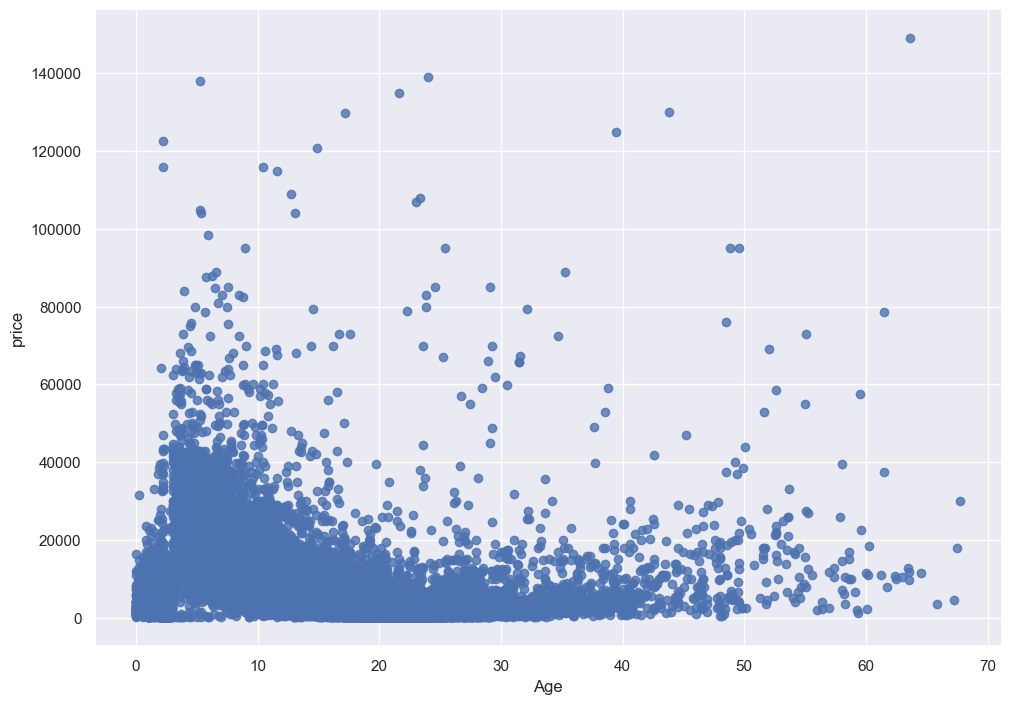

In [22]:
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)
plt.show()
# Cars priced higher are newer
# With increase in age, price decreases
# However some cars are priced higher with increase in age

powerPS vs price

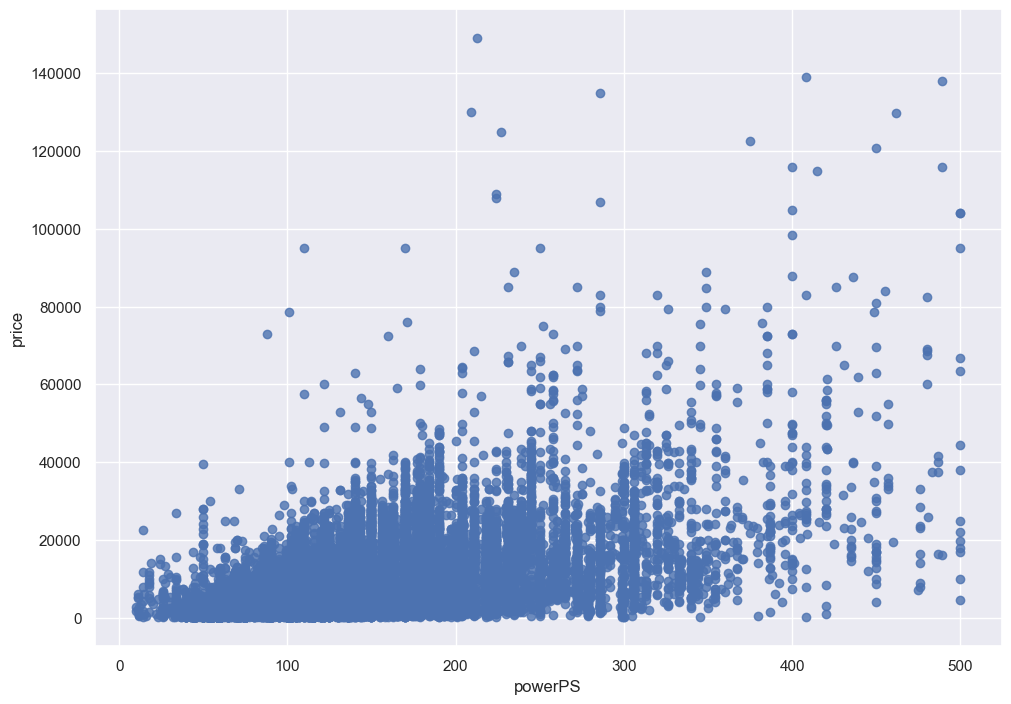

In [23]:
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)
plt.show()

Variable seller

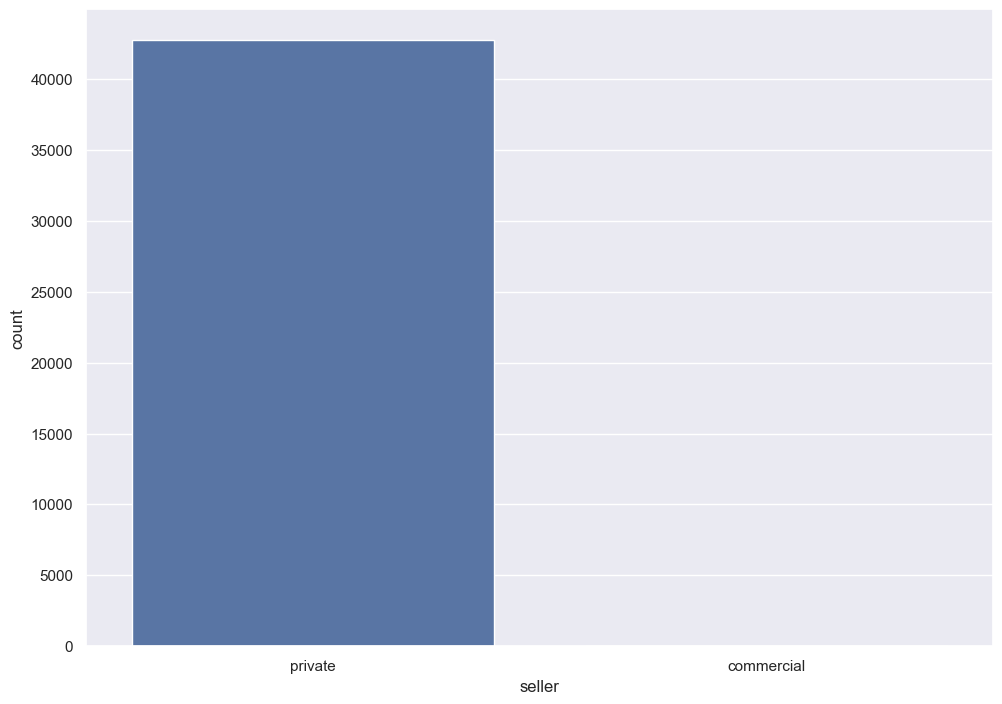

In [24]:
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x= 'seller',data=cars)
plt.show()
# Fewer cars have 'commercial'=> Insignificant

Variable offerType

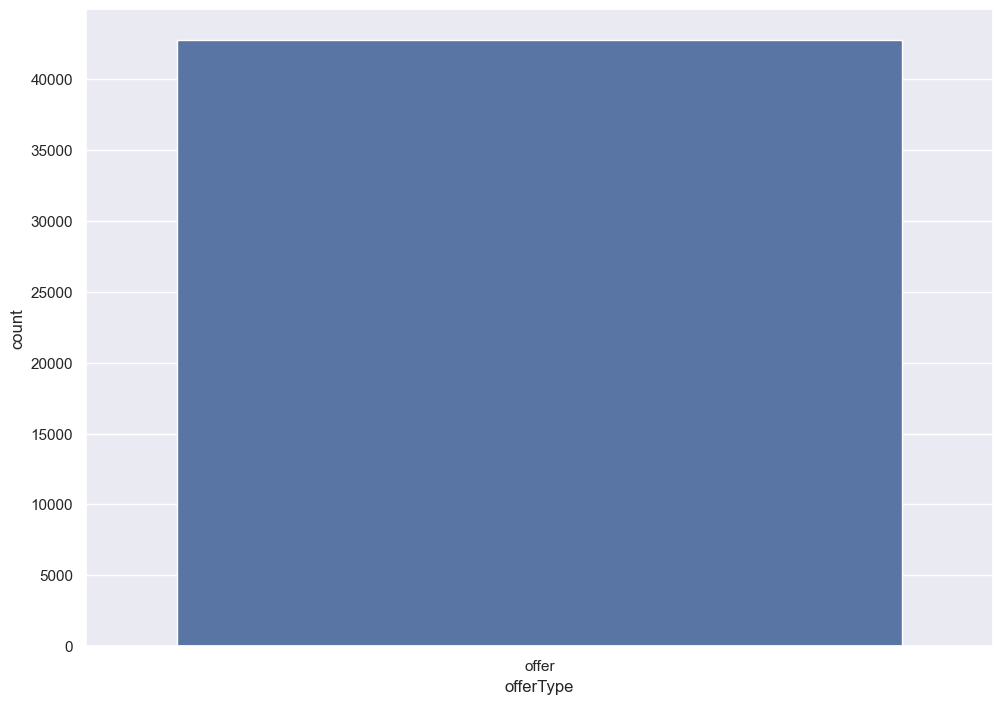

In [25]:
cars['offerType'].value_counts()
sns.countplot(x= 'offerType',data=cars)
plt.show()
# All cars have 'offer'=> Insignificant

Variable abtest

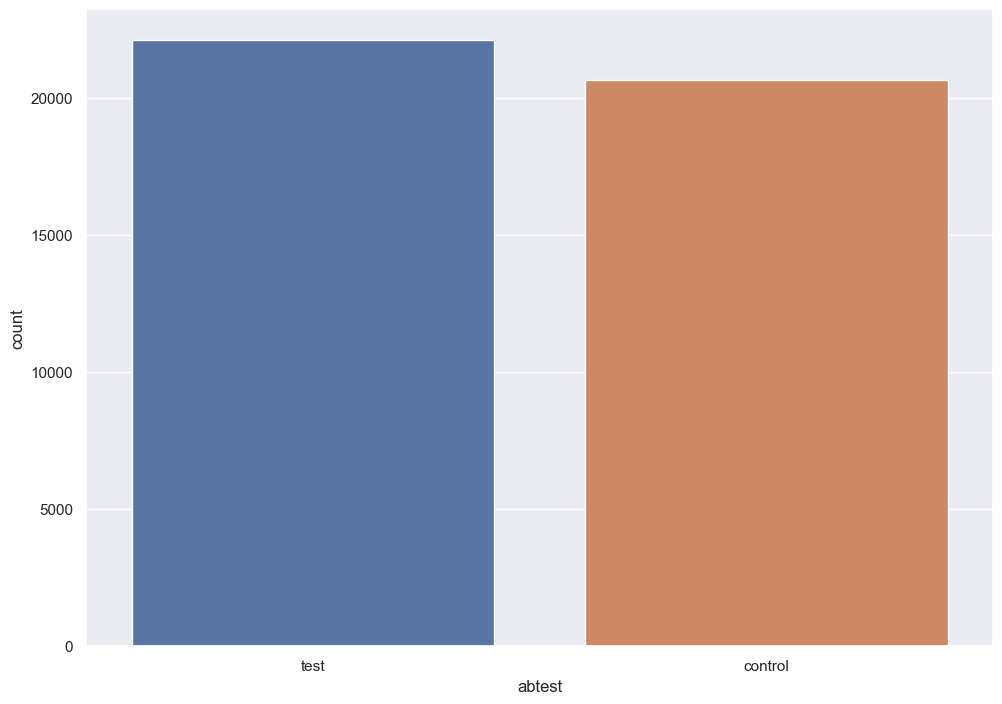

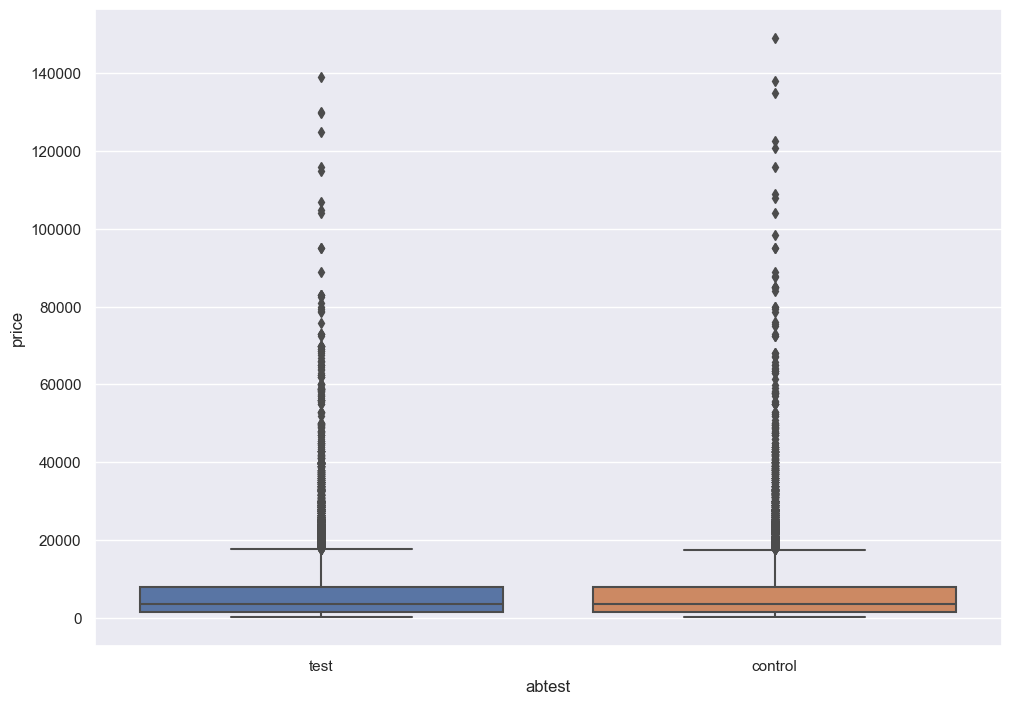

In [26]:
cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.countplot(x= 'abtest',data=cars)
plt.show()
# Equally distributed
sns.boxplot(x= 'abtest',y='price',data=cars)
plt.show()
# For every price value there is almost 50-50 distribution
# Does not affect price => Insignificant

Variable vehicleType

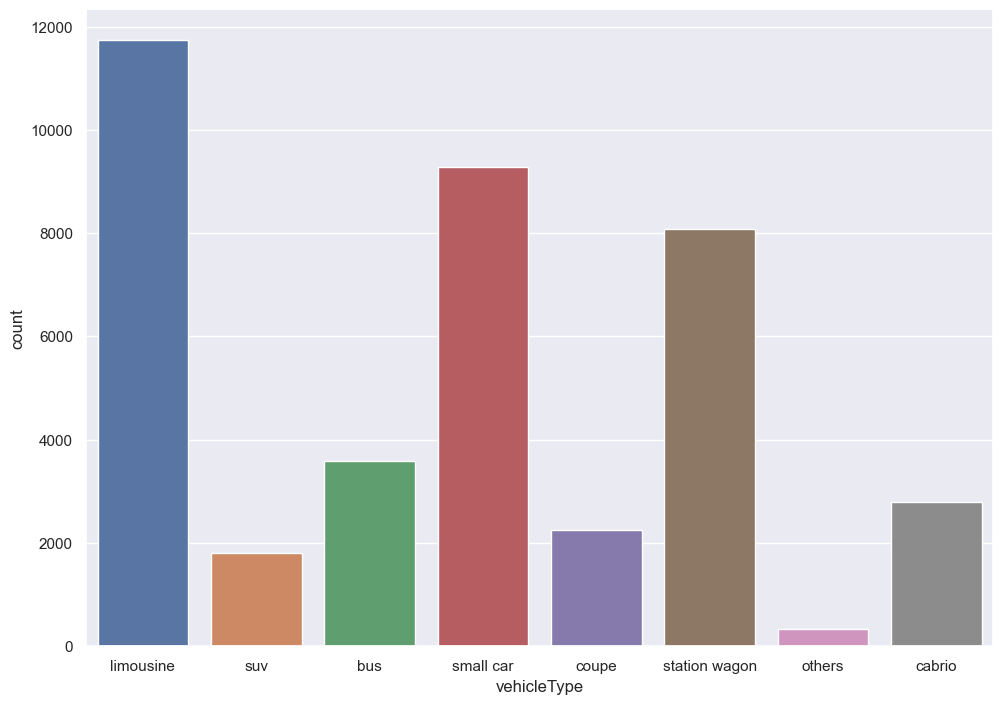

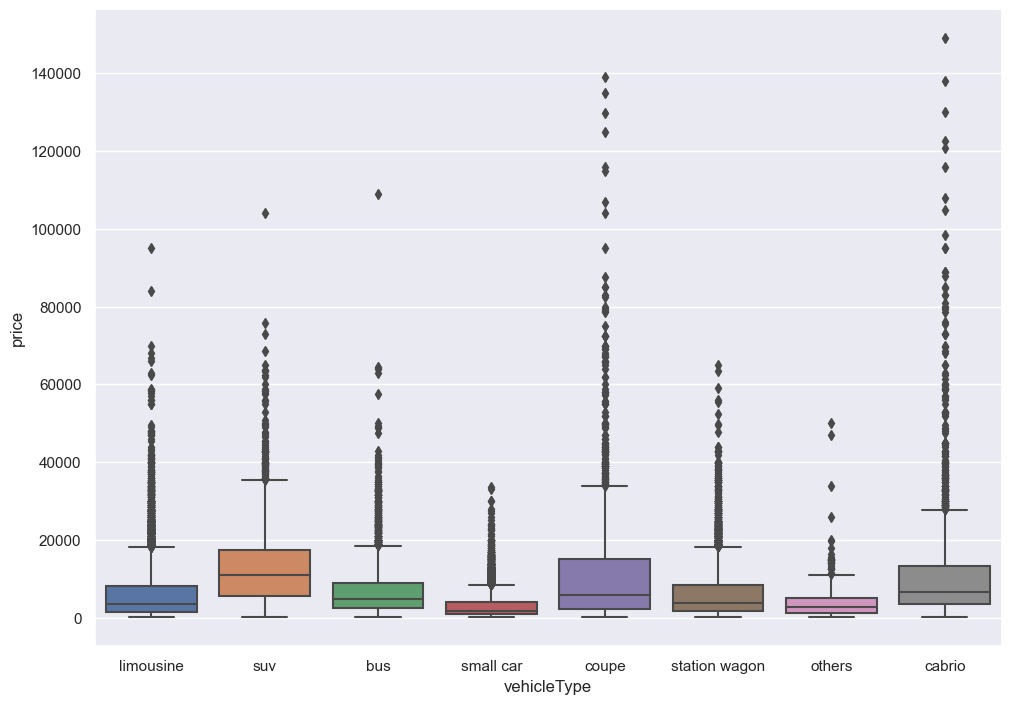

In [27]:
cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.countplot(x= 'vehicleType',data=cars)
plt.show()
sns.boxplot(x= 'vehicleType',y='price',data=cars)
plt.show()
# 8 types- limousine, small cars and station wagons max freq
# vehicleType affects price 

Variable gearbox

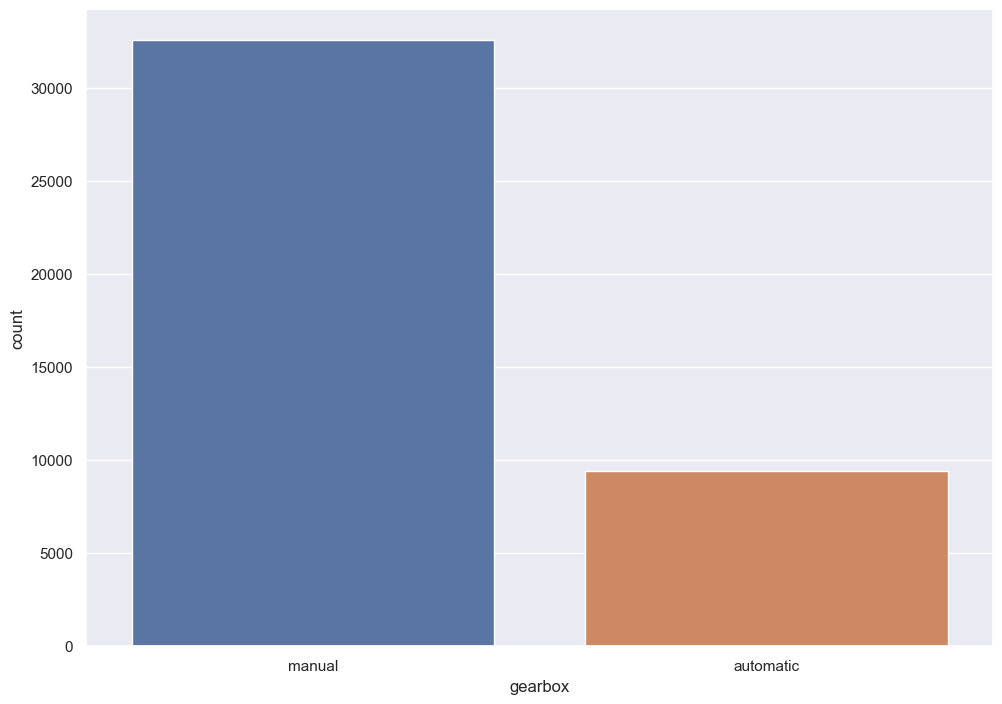

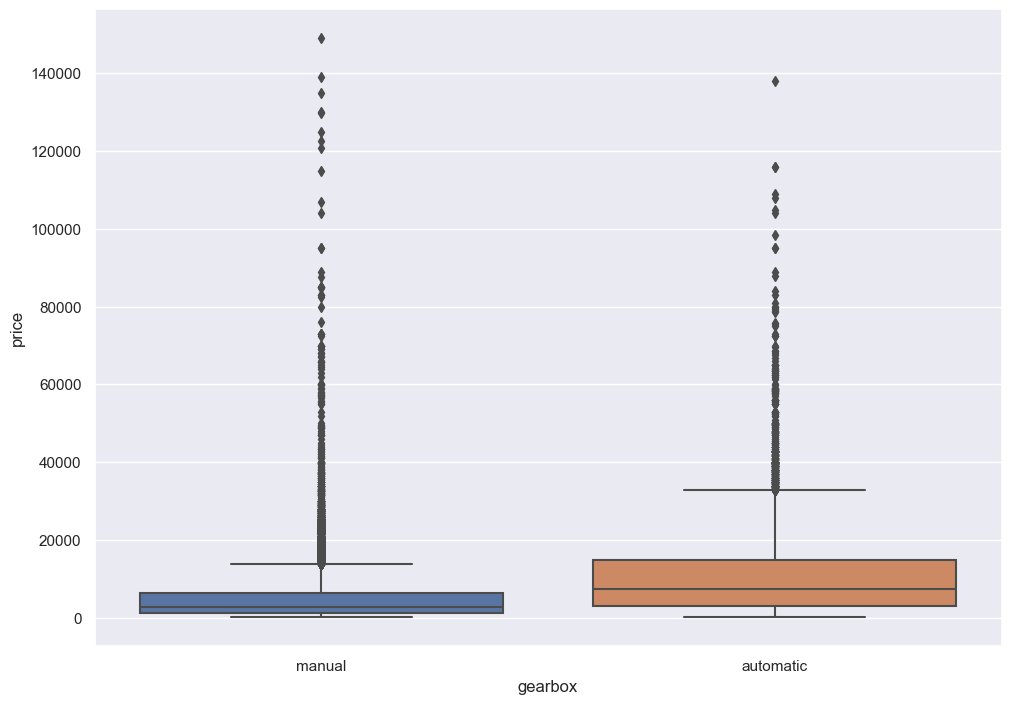

In [28]:
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x= 'gearbox',data=cars)
plt.show()
sns.boxplot(x= 'gearbox',y='price',data=cars)
plt.show()
# gearbox affects price 

Variable model

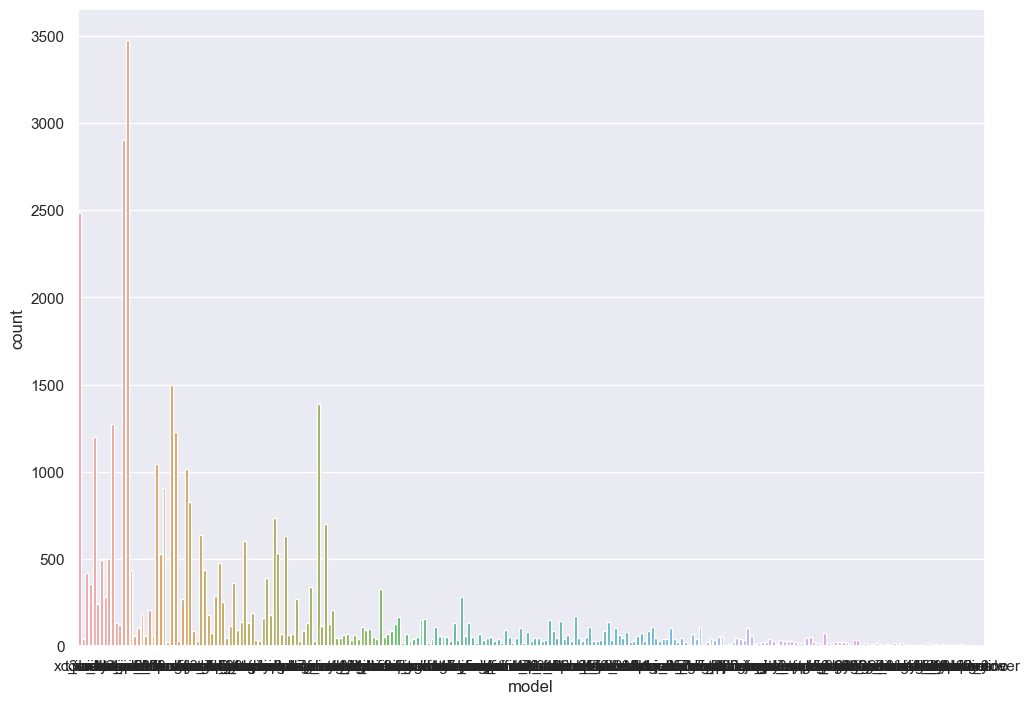

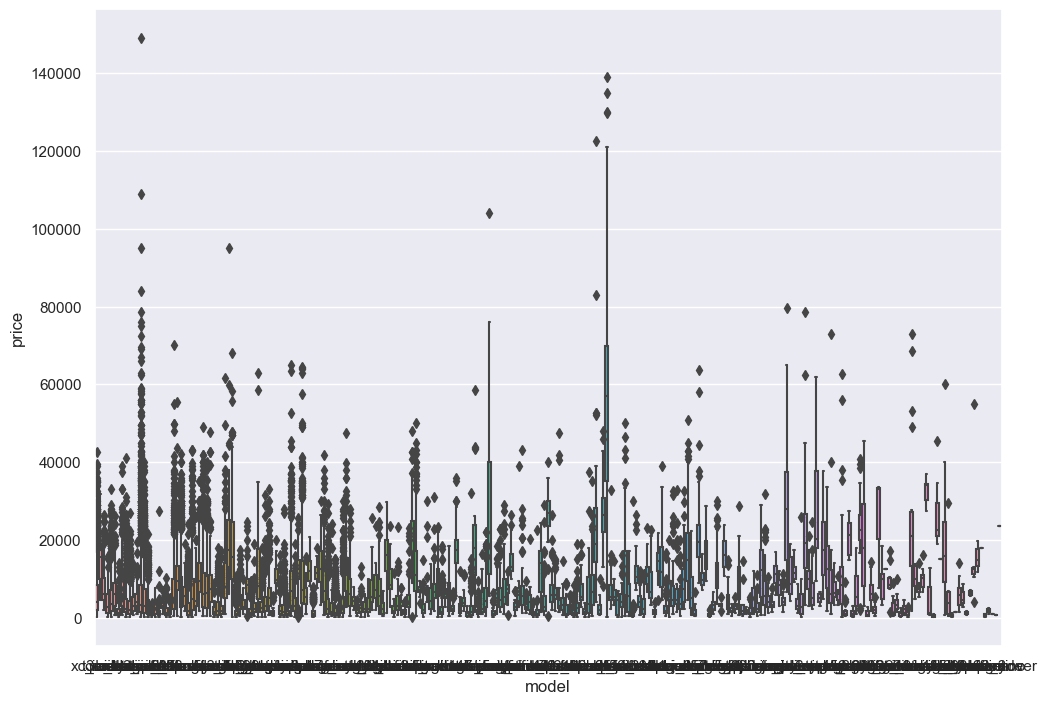

In [29]:
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.countplot(x= 'model',data=cars)
plt.show()
sns.boxplot(x= 'model',y='price',data=cars)
plt.show()
# Cars are distributed over many models
# Considered in modelling

Variable kilometer

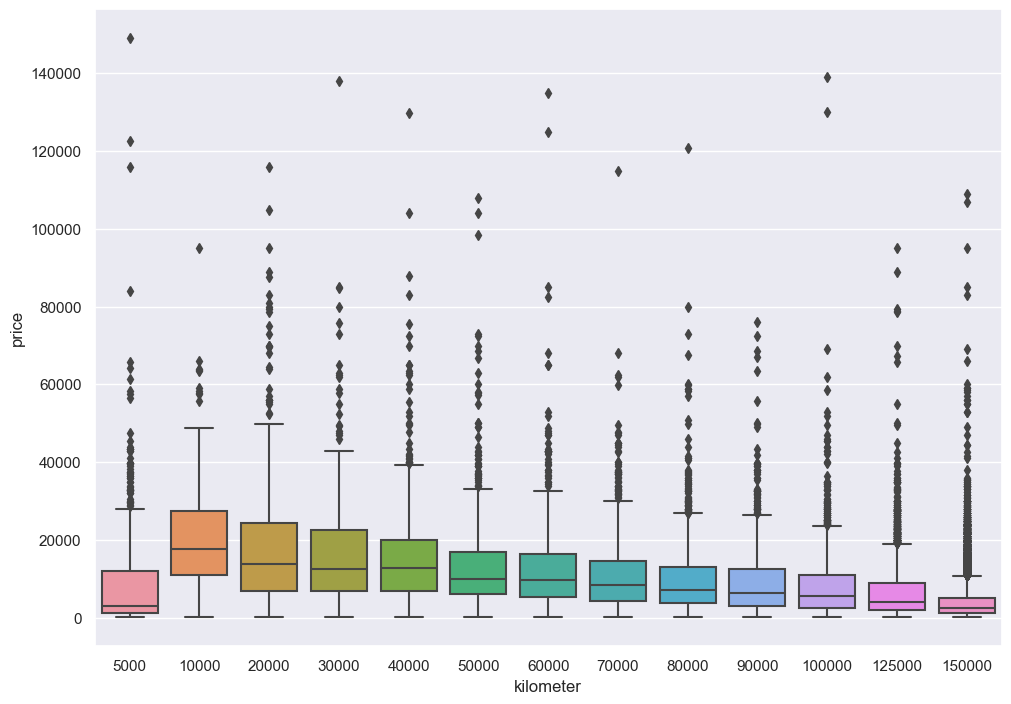

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


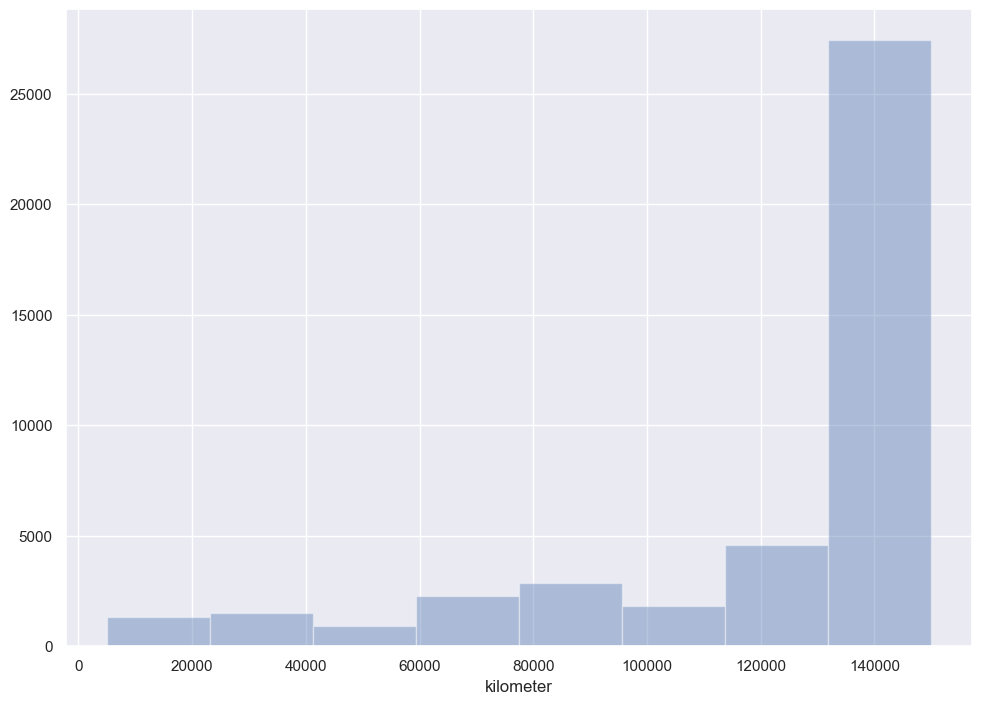

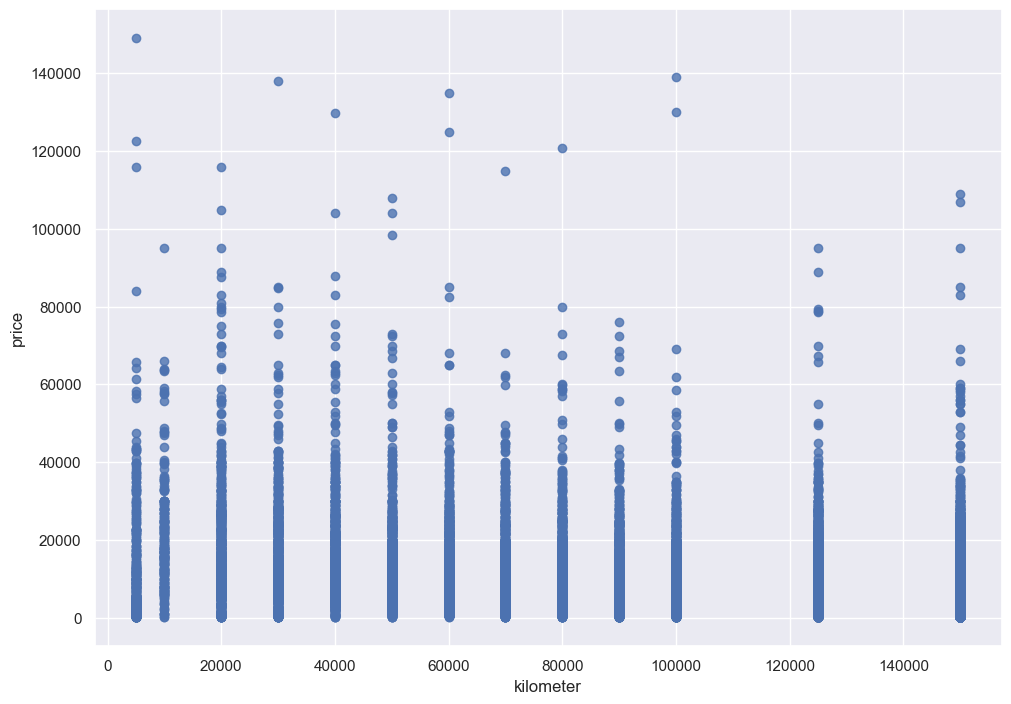

In [30]:
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'],columns='count',normalize=True)
sns.boxplot(x= 'kilometer',y='price',data=cars)
plt.show()
cars['kilometer'].describe()
sns.distplot(cars['kilometer'],bins=8 ,kde=False)
plt.show()
sns.regplot(x='kilometer', y='price', scatter=True, 
            fit_reg=False, data=cars)
plt.show()
# Considered in modelling

Variable fuelType

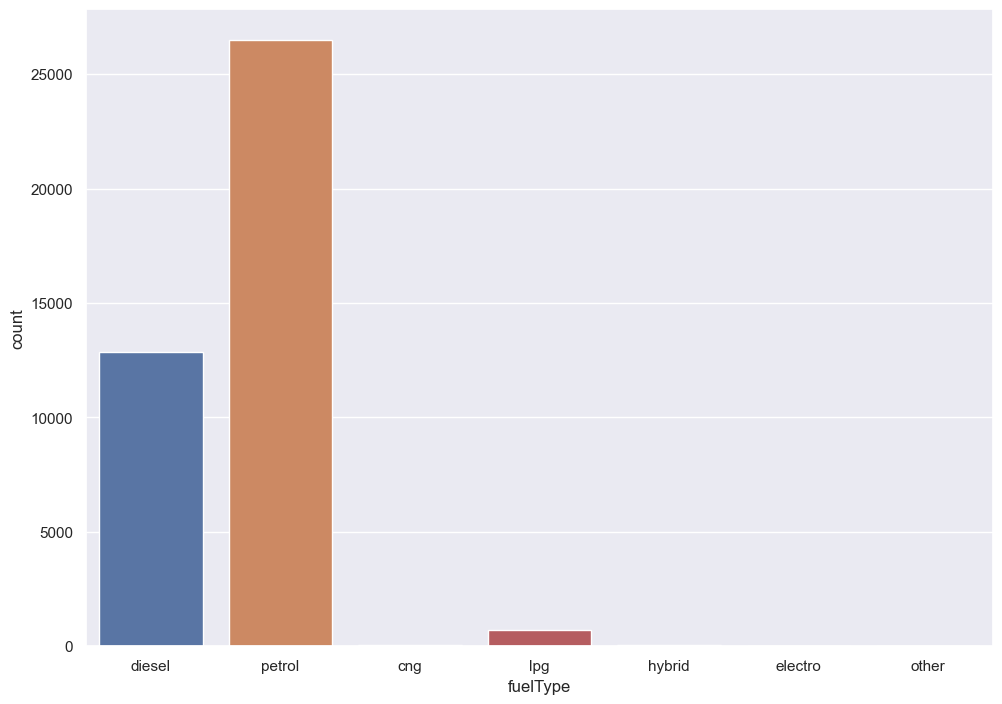

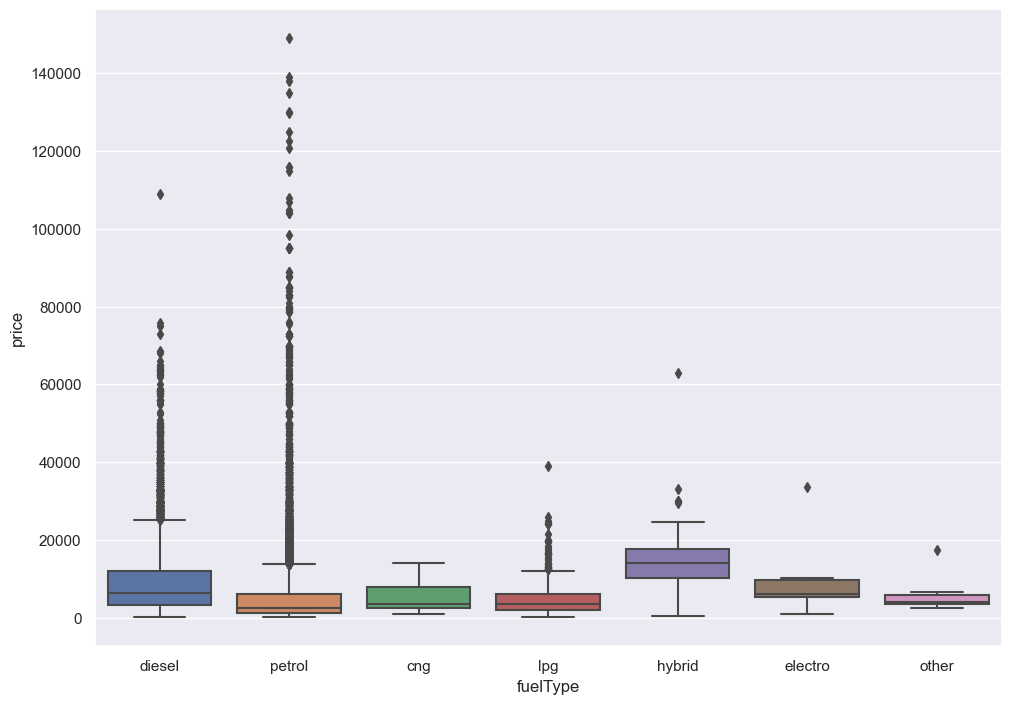

In [31]:
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.countplot(x= 'fuelType',data=cars)
plt.show()
sns.boxplot(x= 'fuelType',y='price',data=cars)
plt.show()
# fuelType affects price

Variable brand

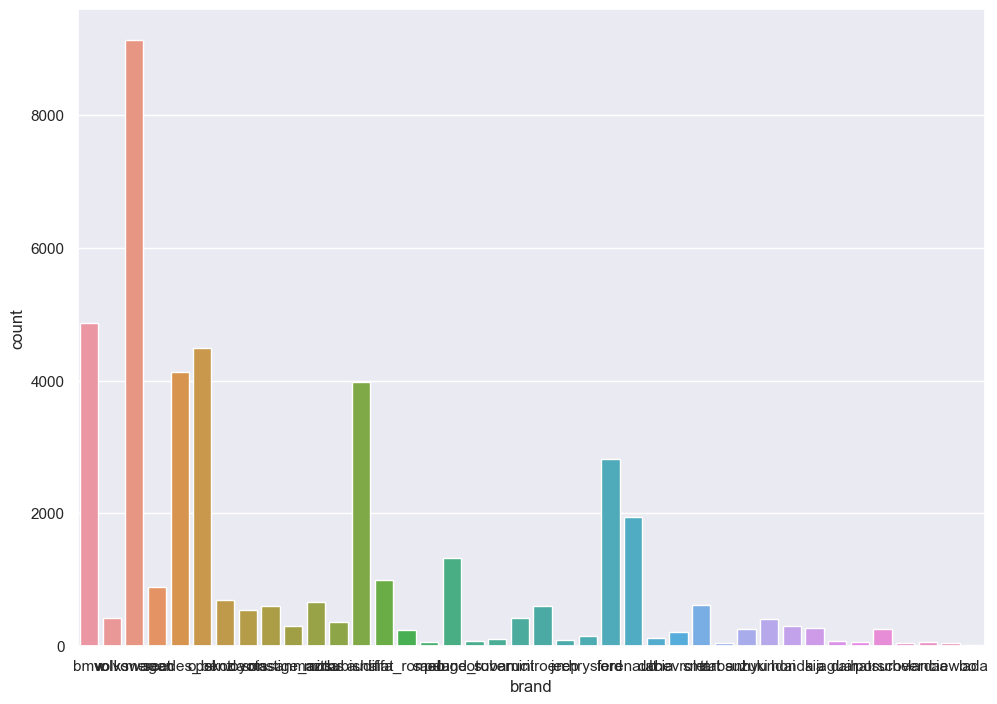

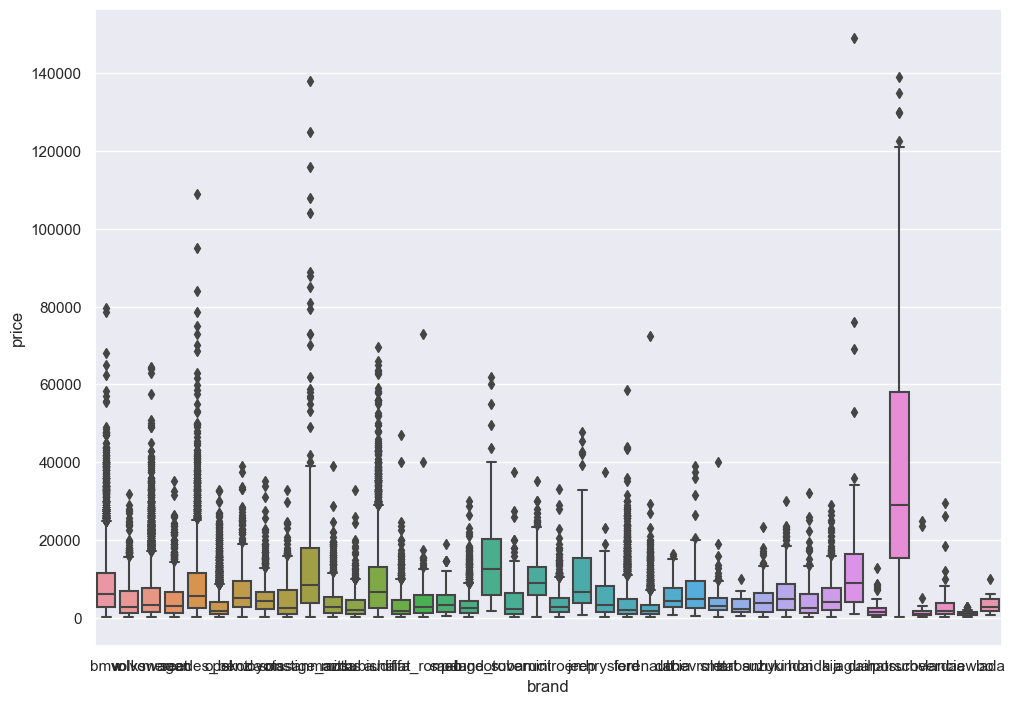

In [32]:
cars['brand'].value_counts()
pd.crosstab(cars['brand'],columns='count',normalize=True)
sns.countplot(x= 'brand',data=cars)
plt.show()
sns.boxplot(x= 'brand',y='price',data=cars)
plt.show()
# Cars are distributed over many brands
# Considered for modelling 

Variable notRepairedDamage<br>
yes- car is damaged but not rectified<br>
no- car was damaged but has been rectified

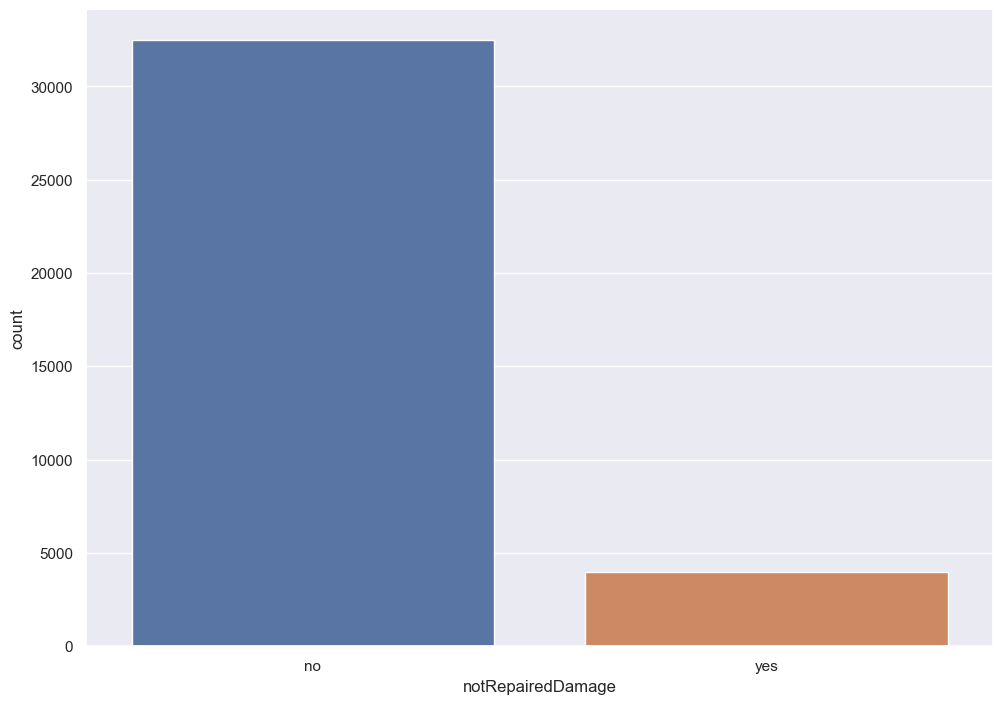

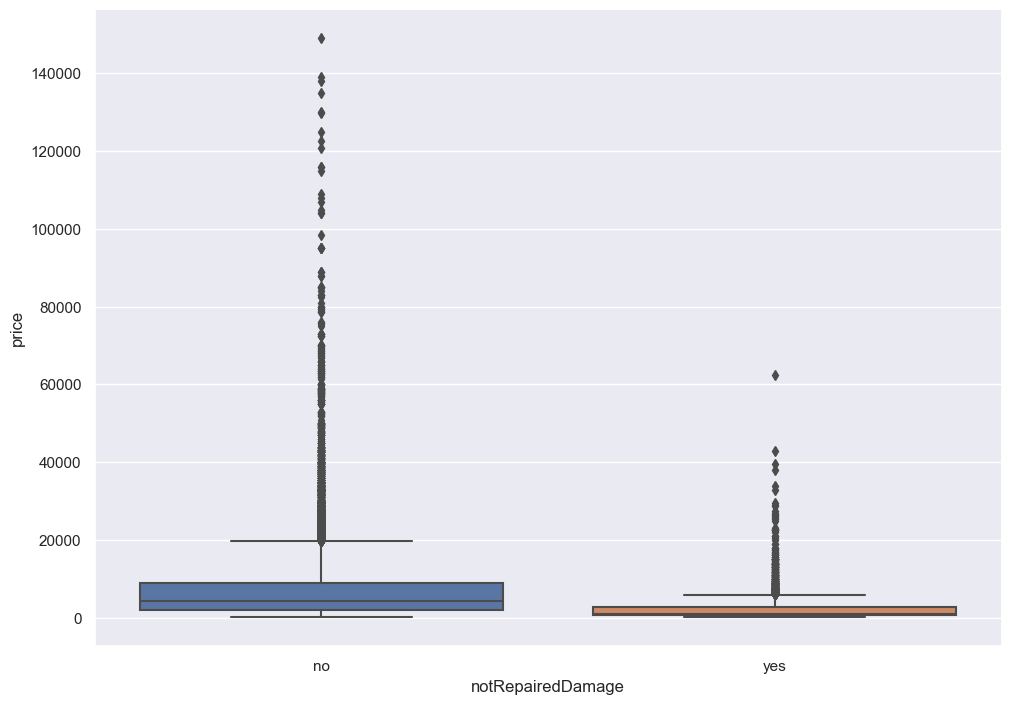

In [33]:
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x= 'notRepairedDamage',data=cars)
plt.show()
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)
plt.show()
# As expected, the cars that require the damages to be repaired
# fall under lower price ranges

=============================================================================<br>
Removing insignificant variables<br>
=============================================================================

In [34]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

=============================================================================<br>
Correlation<br>
=============================================================================

In [35]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]                          

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

=============================================================================


<br>
We are going to build a Linear Regression and Random Forest model<br>
on two sets of data.<br>
1. Data obtained by omitting rows with any missing value<br>
2. Data obtained by imputing the missing values <br>


=============================================================================<br>
OMITTING MISSING VALUES<br>
=============================================================================

In [36]:
cars_omit=cars.dropna(axis=0)

Converting categorical variables to dummy variables

In [37]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True) 

=============================================================================<br>
IMPORTING NECESSARY LIBRARIES<br>
=============================================================================

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

=============================================================================<br>
MODEL BUILDING WITH OMITTED DATA<br>
=============================================================================

Separating input and output features

In [39]:
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

Plotting the variable price

In [78]:
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

Transforming price as a logarithmic value

In [41]:
y1 = np.log(y1)

Splitting data into test and train

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


=============================================================================<br>
BASELINE MODEL FOR OMITTED DATA<br>
=============================================================================


<br>
We are making a base model by using test data mean value<br>
This is to set a benchmark and to compare with our regression model<br>


finding the mean for test data value

In [43]:
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653267


Repeating same value till length of test data

In [44]:
base_pred = np.repeat(base_pred, len(y_test))

finding the RMSE

In [45]:
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
                               
print(base_root_mean_square_error)

1.1274483657478247


=============================================================================<br>
LINEAR REGRESSION WITH OMITTED DATA<br>
=============================================================================

Setting intercept as true

In [46]:
lgr=LinearRegression(fit_intercept=True)

Model

In [47]:
model_lin1=lgr.fit(X_train,y_train)

Predicting model on test set

In [48]:
cars_predictions_lin1 = lgr.predict(X_test)

Computing MSE and RMSE

In [49]:
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513865


R squared value

In [50]:
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649222 0.7800936978183916


Regression diagnostics- Residual plot analysis

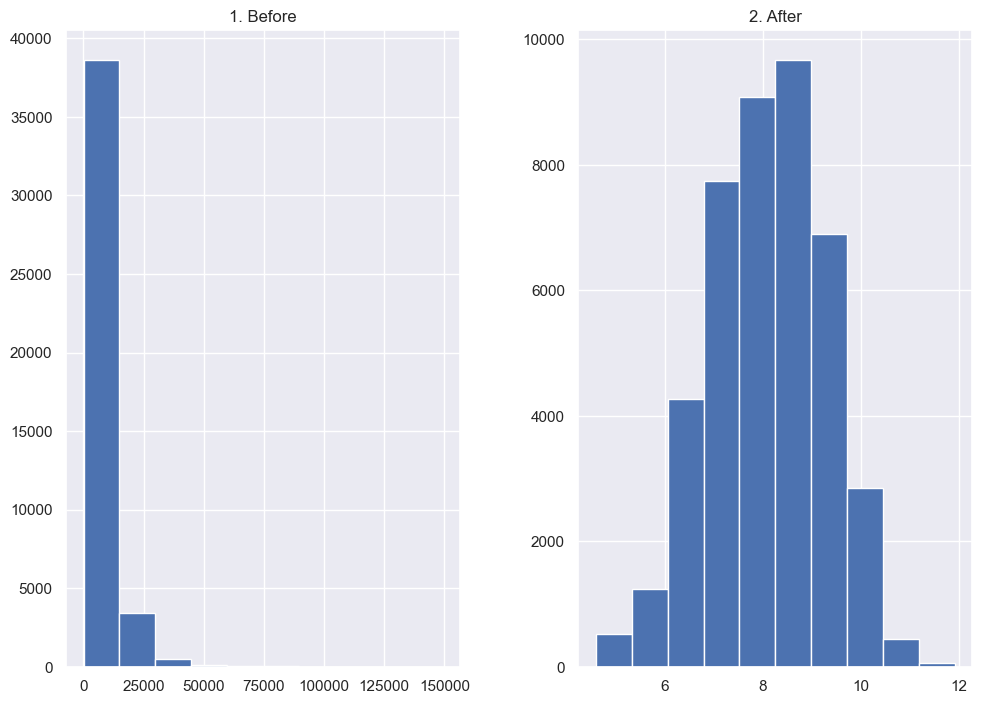

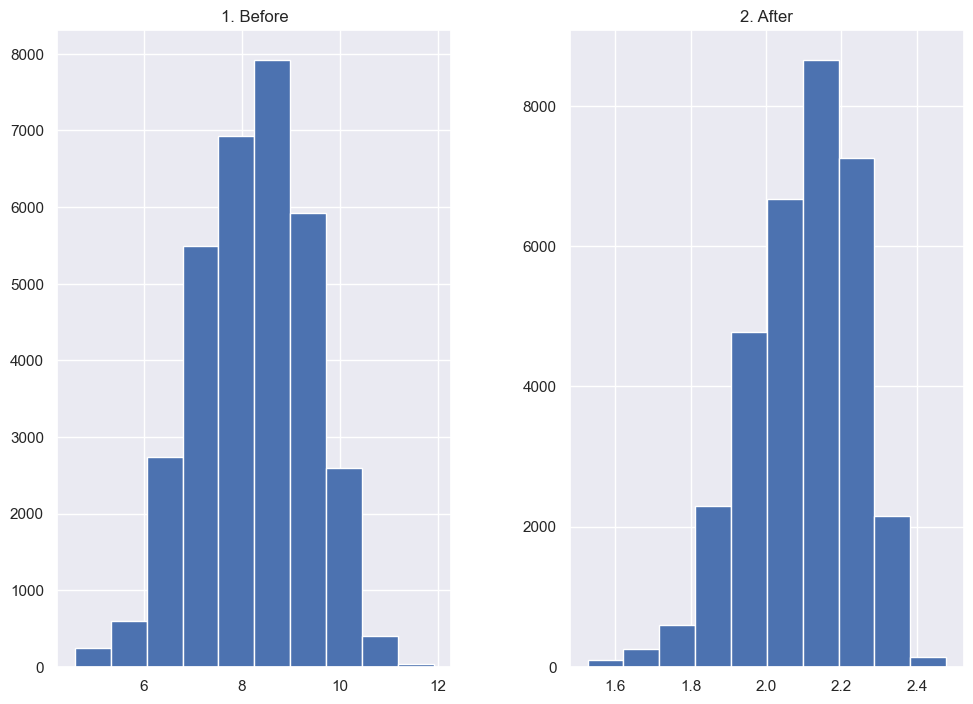

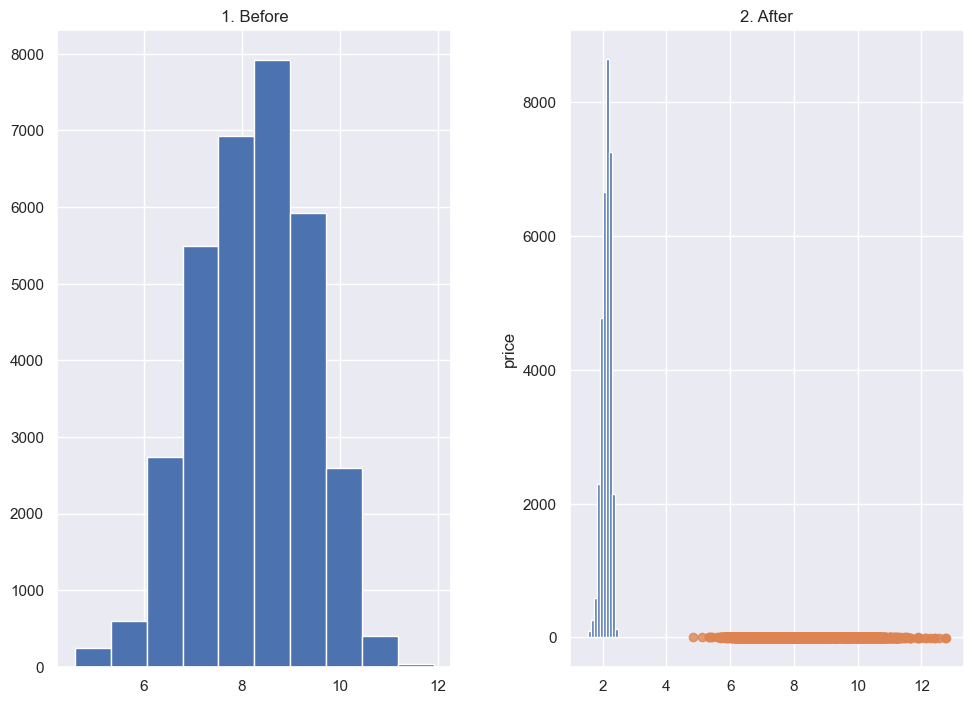

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

In [79]:
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)
plt.show()
residuals1.describe()

=============================================================================<br>
RANDOM FOREST WITH OMITTED DATA<br>
=============================================================================

Model parameters

In [52]:
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

Model

In [53]:
model_rf1=rf.fit(X_train,y_train)

Predicting model on test set

In [54]:
cars_predictions_rf1 = rf.predict(X_test)

Computing MSE and RMSE

In [55]:
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


R squared value

In [56]:
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)   
                     
# =============================================================================
# MODEL BUILDING WITH IMPUTED DATA
# =============================================================================

0.8504018147750623 0.9202494705146291


In [57]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

Converting categorical variables to dummy variables

In [58]:
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True) 

=============================================================================<br>
MODEL BUILDING WITH IMPUTED DATA<br>
=============================================================================

Separating input and output feature

In [59]:
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

Plotting the variable price

In [60]:
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

Transforming price as a logarithmic value

In [61]:
y2 = np.log(y2)

Splitting data into test and train

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


=============================================================================<br>
BASELINE MODEL FOR IMPUTED DATA<br>
=============================================================================


<br>
We are making a base model by using test data mean value<br>
This is to set a benchmark and to compare with our regression model<br>


finding the mean for test data value

In [63]:
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519065


Repeating same value till length of test data

In [64]:
base_pred = np.repeat(base_pred, len(y_test1))

finding the RMSE

In [65]:
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
                               
print(base_root_mean_square_error_imputed)

1.1884349112889792


=============================================================================<br>
LINEAR REGRESSION WITH IMPUTED DATA<br>
=============================================================================

Setting intercept as true

In [66]:
lgr2=LinearRegression(fit_intercept=True)

Model

In [67]:
model_lin2=lgr2.fit(X_train1,y_train1)

Predicting model on test set

In [68]:
cars_predictions_lin2 = lgr2.predict(X_test1)

Computing MSE and RMSE

In [69]:
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6483956449231291


R squared value

In [70]:
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.702333900863119 0.7071658736894363


=============================================================================<br>
RANDOM FOREST WITH IMPUTED DATA<br>
=============================================================================

Model parameters

In [71]:
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

Model

In [72]:
model_rf2=rf2.fit(X_train1,y_train1)

Predicting model on test set

In [73]:
cars_predictions_rf2 = rf2.predict(X_test1)

Computing MSE and RMSE

In [74]:
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


R squared value

In [75]:
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)                            

0.8269964521311131 0.9024289431669166


############################################################################

Final output

In [76]:
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7800936978183916
R squared value for test from Linear Regression=  0.7658615091649222
R squared value for train from Random Forest=  0.9202494705146291
R squared value for test from Random Forest=  0.8504018147750623
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.5455481266513865
RMSE value for test from Random Forest=  0.4360736289370223



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7071658736894363
R squared value for test from Linear Regression=  0.702333900863119
R squared value for train from Random Forest=  0.9024289431669166
R squared value for test from Random Forest=  0.8269964521311131
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for tes

=============================================================================<br>
END OF SCRIPT<br>
=============================================================================